In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from scipy.stats import skew

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.svm import LinearSVC, SVC
from mlxtend.classifier import StackingClassifier

from sklearn.feature_selection import chi2, SelectKBest, f_regression

from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# read data
df = pd.read_csv("/content/drive/MyDrive/Nilesh/ML Project/data.csv")

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
df.shape

(50553, 12)

In [5]:
# we will get the list of thenumbers of all the unique values for each columns.
df.nunique()

ID                      50553
Agency                     16
Agency Type                 2
Distribution Channel        2
Product Name               25
Claim                       2
Duration                  444
Destination               102
Net Sales                1053
Commision (in value)      964
Gender                      2
Age                        88
dtype: int64

In [6]:
# To get the null values and dtype of each feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [7]:
# check null values in data
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [8]:
# check null values in data in Percentage
df.isnull().sum()/len(df) * 100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [9]:
# renaming column
df.rename(columns={"Commision (in value)":"Commision"},inplace=True)

In [10]:
# Droping ID column because each value is unique and does not seem  an important column.
df.drop(["ID"],axis=1,inplace=True)

In [11]:
print(df["Gender"].value_counts().sum())
print(len(df))
print("Total Null values preent in Gender column are :",len(df)-df["Gender"].value_counts().sum())

14600
50553
Total Null values preent in Gender column are : 35953


<li><b>35953/50553 are null values, nearly 71% data in the column are null values.</b></li>
<li><b>We will drop the column as there does not seem to be any other feature that could help us with filling the missing values & since only less than 30% of data exist.</b></li>

In [12]:
# Droping Gender column
df.drop(["Gender"],axis=1,inplace=True)

In [13]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision               0
Age                     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                50553 non-null  object 
 1   Agency Type           50553 non-null  object 
 2   Distribution Channel  50553 non-null  object 
 3   Product Name          50553 non-null  object 
 4   Claim                 50553 non-null  int64  
 5   Duration              50553 non-null  int64  
 6   Destination           50553 non-null  object 
 7   Net Sales             50553 non-null  float64
 8   Commision             50553 non-null  float64
 9   Age                   50553 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [15]:
# let's seperate the data in categorical and numerical features.
# categorical data
df_cat = df.select_dtypes("object")

In [16]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


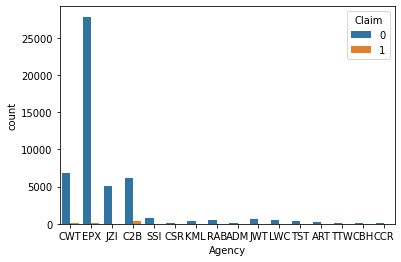

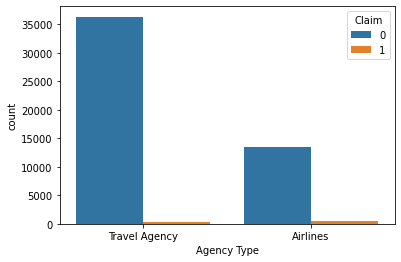

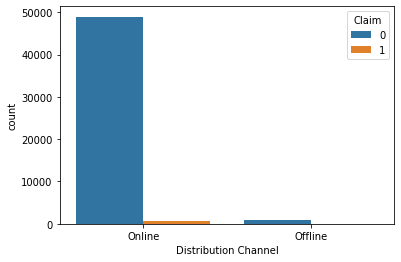

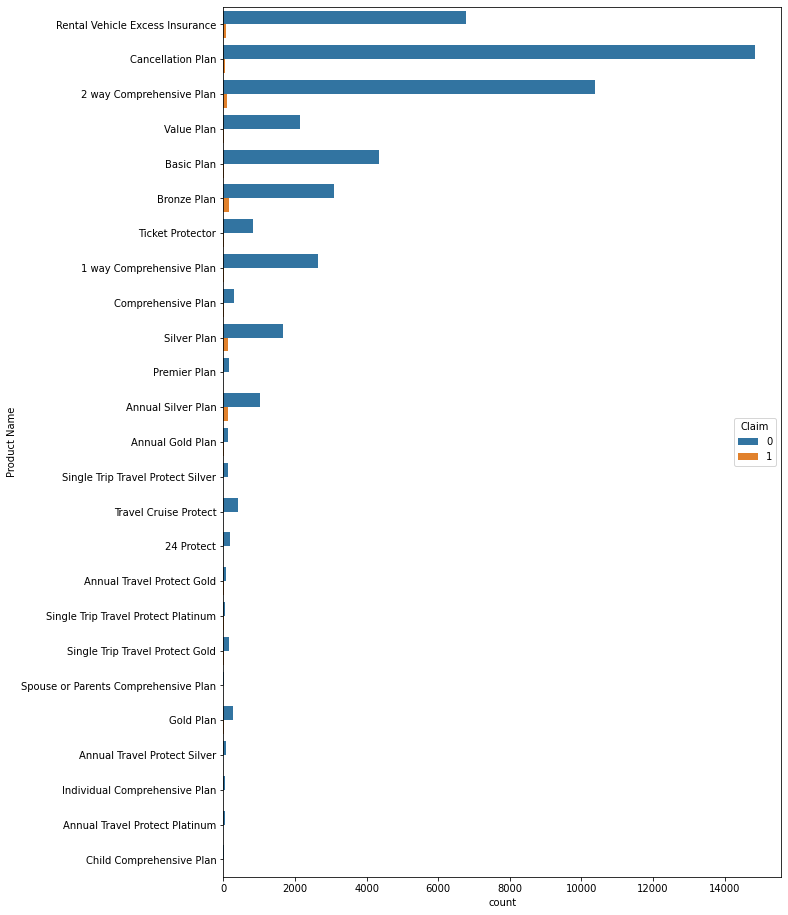

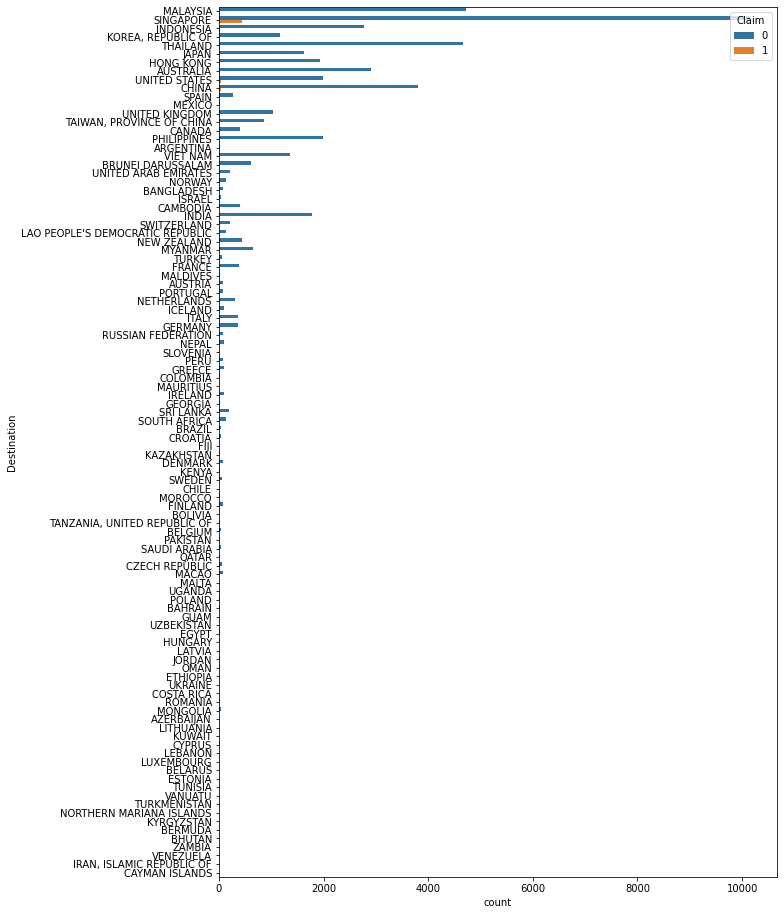

In [17]:
for col in df_cat:
 if (col == "Product Name") or (col == "Destination"):
    plt.figure(figsize=(10,16))
    sns.countplot(data=df,y=col,hue="Claim")
    plt.show()
 else:
    plt.figure()
    sns.countplot(data=df,x=col,hue="Claim")
    plt.show()

In [18]:
# not much impact on target column
# lot of levels in destination

df_cat.drop("Distribution Channel",axis=1,inplace=True)
df_cat.drop("Destination",axis=1,inplace=True)

In [19]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

In [20]:
df_cat.head()

,Agency,Agency Type,Product Name
0,6,1,16
1,7,1,10
2,6,1,16
3,7,1,1
4,7,1,10


In [21]:
# claim is the target so we will drop it
# Numerical columns
df_num = df.select_dtypes(["int64","float64"]).drop("Claim",axis=1)

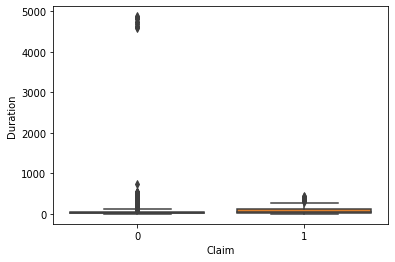

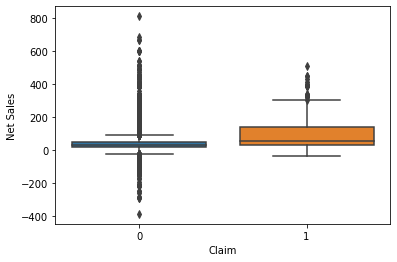

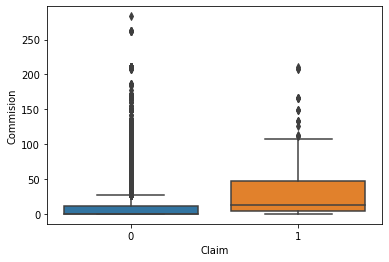

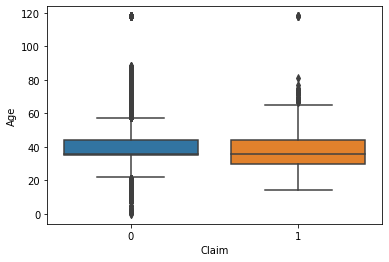

In [22]:
for col in df_num:
  plt.figure()
  sns.boxplot(data=df,y=col,x="Claim")
  plt.show()

------------------------------------------------------------
Duration -> 22.872063891229274


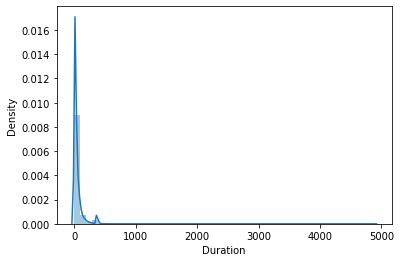

------------------------------------------------------------
Net Sales -> 3.3281441910342053


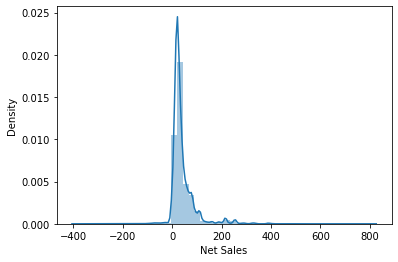

------------------------------------------------------------
Commision -> 4.0780684356634636


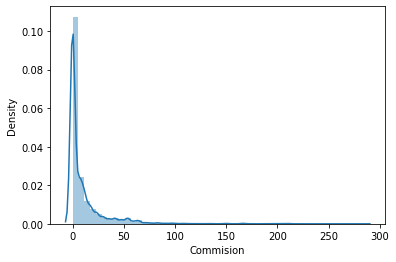

------------------------------------------------------------
Age -> 2.9783898494112435


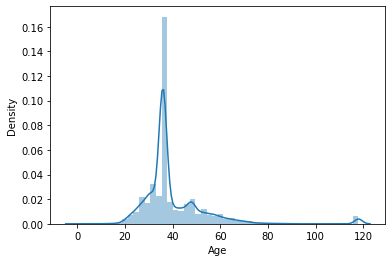

In [23]:
for col in df_num:
  print("------"*10)
  print(col,"->",skew(df_num[col]))
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

In [24]:
df_num.describe()

,Duration,Net Sales,Commision,Age
count,50553.000000,50553.000000,50553.00000,50553.000000
mean,49.425969,40.800977,9.83809,40.011236
std,101.434647,48.899683,19.91004,14.076566
min,-2.000000,-389.000000,0.00000,0.000000
25%,9.000000,18.000000,0.00000,35.000000
50%,22.000000,26.500000,0.00000,36.000000
75%,53.000000,48.000000,11.55000,44.000000
max,4881.000000,810.000000,283.50000,118.000000


<b>Observations:</b>

<li>Duration and Net Sales columns having negative value</li>
<li>Age column having max value as 118</li>

In [25]:
# Baseline model
df_1 = pd.concat([df_cat,df_num],axis=1)
df_1.head()

,Agency,Agency Type,Product Name,Duration,Net Sales,Commision,Age
0,6,1,16,7,0.0,17.82,31
1,7,1,10,85,69.0,0.00,36
2,6,1,16,11,19.8,11.88,75
3,7,1,1,16,20.0,0.00,32
4,7,1,10,10,15.0,0.00,29


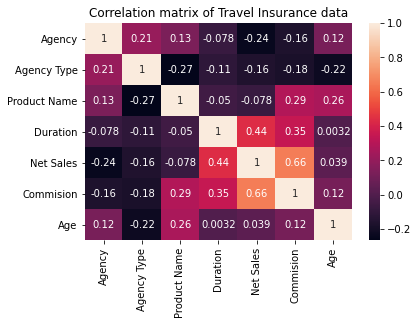

In [26]:
plt.figure()
sns.heatmap(df_1.corr(), annot=True)
plt.title("Correlation matrix of Travel Insurance data")
plt.show()

Net Sales and Commision are highly correlated feature.

In [27]:
X = df_1
y = df["Claim"]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Logistic Regression.

In [29]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



### Decision Tree Classifier.

In [30]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14961
           1       0.06      0.06      0.06       205

    accuracy                           0.97     15166
   macro avg       0.52      0.52      0.52     15166
weighted avg       0.97      0.97      0.97     15166



In [31]:
dt2 = DecisionTreeClassifier(max_depth=4)
dt2.fit(X_train,y_train)
y_pred = dt2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



### Linear Support Vector Machine (Linear SVM).

In [32]:
lsv = LinearSVC(random_state=1)
lsv.fit(X_train,y_train)
y_pred = lsv.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



### Random forest classifier.

In [33]:
rf = RandomForestClassifier(n_estimators=6,max_features=6,random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.10      0.03      0.05       205

    accuracy                           0.98     15166
   macro avg       0.54      0.51      0.52     15166
weighted avg       0.97      0.98      0.98     15166



### Adaboost classifier.

In [34]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



<li><b><h>Here we observe the accuracy score is good but the precision score and recall soore is 0.</b></h></li>

In [35]:
# lets have a look on target column 
df["Claim"].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

0    49812
1      741
Name: Claim, dtype: int64
------------------------------------------------------------


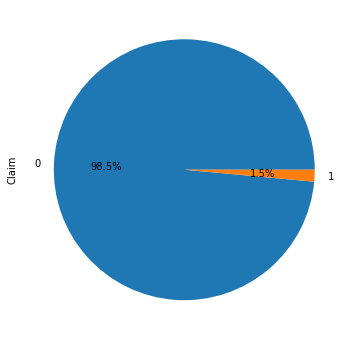

In [36]:
print(df["Claim"].value_counts())
print("------"*10)
plt.figure(figsize=(6,6))
df["Claim"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

0    49812
1      741
Name: Claim, dtype: int64
------------------------------------------------------------


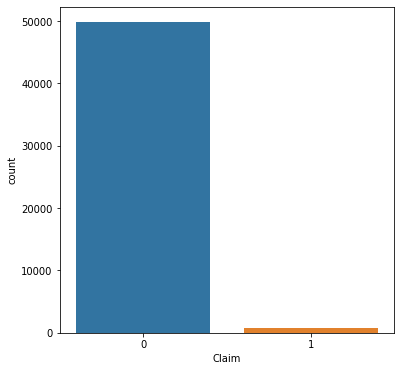

In [37]:
print(df["Claim"].value_counts())
print("------"*10)
plt.figure(figsize=(6,6))
sns.countplot(df["Claim"])
plt.show()

<b>Observation.</b>
<li>Out of 49812, only 741 buyers claimed which is only 1.5%.</li>
<li>This is imbalanced dataset.</li>
<li>Let balance our data and look the score.</li>

In [38]:
X = df_1
y = df["Claim"]

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Under Sample.

In [40]:
rus = RandomUnderSampler()
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [41]:
# LogisticRegression

lr = LogisticRegression()
lr.fit(X_sample1,y_sample1)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     14961
           1       0.05      0.61      0.09       205

    accuracy                           0.83     15166
   macro avg       0.52      0.72      0.50     15166
weighted avg       0.98      0.83      0.89     15166



In [42]:
# Decision tree

dt = DecisionTreeClassifier()
dt.fit(X_sample1,y_sample1)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80     14961
           1       0.03      0.65      0.05       205

    accuracy                           0.67     15166
   macro avg       0.51      0.66      0.43     15166
weighted avg       0.98      0.67      0.79     15166



In [43]:
dt.get_depth()

18

In [44]:
# Pruning

dt2 = DecisionTreeClassifier(max_depth=2)
dt2.fit(X_sample1,y_sample1)
y_pred = dt2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     14961
           1       0.06      0.56      0.10       205

    accuracy                           0.87     15166
   macro avg       0.52      0.72      0.51     15166
weighted avg       0.98      0.87      0.92     15166



In [45]:
# LSV

lsv = LinearSVC(random_state=1)
lsv.fit(X_sample1,y_sample1)
y_pred = lsv.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.19     14961
           1       0.01      0.98      0.03       205

    accuracy                           0.12     15166
   macro avg       0.51      0.54      0.11     15166
weighted avg       0.98      0.12      0.19     15166



<li><b>As we can observe that the recall score is increased but precision and f1-score is not so good, so now lets try oversamples.
</b></li>

## Over Sample.

In [46]:
ros = RandomOverSampler(random_state=1)

In [47]:
X_sample2, y_sample2 = ros.fit_sample(X_train,y_train)

In [48]:
# LogisticRegression.

lr2 = LogisticRegression()
lr2.fit(X_sample2, y_sample2)
y_pred3= lr2.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14961
           1       0.05      0.61      0.09       205

    accuracy                           0.83     15166
   macro avg       0.52      0.72      0.50     15166
weighted avg       0.98      0.83      0.90     15166



In [49]:
# LSV

lsv1 = LinearSVC(random_state=1)
lsv1.fit(X_sample2,y_sample2)
y_pred = lsv1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.41      0.58     14961
           1       0.02      0.88      0.04       205

    accuracy                           0.42     15166
   macro avg       0.51      0.65      0.31     15166
weighted avg       0.98      0.42      0.57     15166



In [50]:
# Decision Tree - Pruning.

dt3 = DecisionTreeClassifier(max_depth=2)
dt3.fit(X_sample2,y_sample2)
y_pred1 = dt3.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     14961
           1       0.06      0.56      0.10       205

    accuracy                           0.87     15166
   macro avg       0.52      0.71      0.51     15166
weighted avg       0.98      0.87      0.92     15166



<li><b>Since not getting good score, so now let handel skewness and outlier and observe the score.</b></li>

In [51]:
# Age
len(df_num[df_num["Age"]>100])

795

In [52]:
mean_senior = df_num["Age"][df_num["Age"]>70].mean()
mean_senior

101.10841546626231

In [53]:
df["Age"][df["Age"] > 100] = mean_senior

In [54]:
# Duration
df[df_num["Duration"] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age
4063,JZI,Airlines,Online,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,101.108415
38935,JZI,Airlines,Online,Basic Plan,0,-1,INDONESIA,18.0,6.3,101.108415
48367,JZI,Airlines,Online,Basic Plan,0,-2,BANGLADESH,22.0,7.7,101.108415


In [55]:
# lets fill the -ve values with mean of duration
df.Duration.mean()

49.4259687852353

In [56]:
df_num.loc[4063,"Duration"] = 49.42
df_num.loc[38935,"Duration"] = 49.42
df_num.loc[48367,"Duration"] = 49.42

In [57]:
df_num.Duration.describe()

count    50553.000000
mean        49.428981
std        101.433893
min          0.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

In [58]:
# Handling skewness.

df_num["Duration"] = np.sqrt(df_num["Duration"])
df_num["Commision"] = np.sqrt(df_num["Commision"])
df_num["Age"] = np.sqrt(df_num["Age"])

In [59]:
# standardization

for col in df_num:
    ss = StandardScaler()
    df_num[col] = ss.fit_transform(df_num[[col]])

In [60]:
df_new = pd.concat([df_cat,df_num],axis=1)

In [61]:
df_new.head()

,Agency,Agency Type,Product Name,Duration,Net Sales,Commision,Age
0,6,1,16,-0.786727,-0.834389,0.934099,-0.704119
1,7,1,10,0.859752,0.576677,-0.740905,-0.258444
2,6,1,16,-0.618699,-0.429475,0.626730,2.484523
3,7,1,1,-0.447541,-0.425385,-0.740905,-0.612259
4,7,1,10,-0.657357,-0.527636,-0.740905,-0.892396


In [62]:
X = df_new
y = df["Claim"]

## Fit and Predict
<li><b>Creating a Function to train, fit, and predict the model, and to display the report.</b></li>

In [63]:
def model_sel(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
    
  return classification_report(y_test, y_pred)

In [64]:
#Ensembling techniques
# Naive aggregation

lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

model_list = [('lr',lr),('dt1',dt1),('dt2',dt2)]

In [65]:
# Stacking.

lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

model_list1 = [lr, dt1, dt2]

## All Models.
<li><b>Creating a Function where all the models will be defined and then passed to "model_sel" for the model to be created.</b></li>

In [66]:

def models(X, y):
  
  lr = LogisticRegression()
  dt = DecisionTreeClassifier()
  dt1 = DecisionTreeClassifier(min_samples_leaf=19)
  vc =  VotingClassifier(estimators=model_list,voting="soft")
  bg = BaggingClassifier(LogisticRegression())
  abc = AdaBoostClassifier(n_estimators=100)
  gb = GradientBoostingClassifier(n_estimators=100)
  xbc = XGBClassifier(n_estimators=200, reg_alpha=1)
  rfc = RandomForestClassifier()
  sc = StackingClassifier(classifiers=model_list1, meta_classifier=lr)
  lsvc = LinearSVC(random_state=1)
  svc = SVC(random_state=1)
  svc_poly = SVC(random_state=1,kernel="poly")
  svc_rb = SVC(random_state=1,kernel="rbf")

  print("{} \n {}\n" .format("LOGISTIC REGRESSION", model_sel(lr, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("DECISION TREE", model_sel(dt, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("DECISION TREE - PRUNING", model_sel(dt1, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("VOTING CLASSIFIER - SOFT VOTING", model_sel(vc, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("BAGGING CLASSIFIER - PASTING", model_sel(bg, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("ADABOOST", model_sel(abc, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("GRADIENT BOOST", model_sel(gb, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("XGBOOST", model_sel(xbc, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("RANDOM FOREST", model_sel(rfc, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("STACKING", model_sel(sc, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("LINEAR SVM", model_sel(lsvc, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("SVM", model_sel(svc, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("SVM - POLYNOMIAL KERNEL FUNCTION", model_sel(svc_poly, X, y)))
  print("------"*10)
  print("{} \n {}\n" .format("SVM - RADIAL BASIS KERNEL FUNCTION", model_sel(svc_rb, X, y))) 

  return lr, dt, dt1, vc, bg, abc, gb, xbc, rfc, lsvc, svc, svc_poly, svc_rb

## Under Sampling.
<li><b>The number of "0" will be reduced down to equal the number of "1".</b></li>

In [67]:
def under_sample():
    X = df_new
    y = df["Claim"]
    print(pd.Series(y_train).value_counts())
    undersample = RandomUnderSampler(random_state=1)
    X_under, y_under = undersample.fit_sample(X_train,y_train)
    print(pd.Series(y_under).value_counts())
    print("------"*10)

    lr, dt, dt1, vc, bg, abc, gbc, xbc, rfc, lsvc, svc, svc_poly, svc_rb = models(X_under, y_under)
    return lr, dt, dt1, vc, bg, abc, gbc, xbc, rfc, lsvc, svc, svc_poly, svc_rb, X_under, y_under


## Over Sampling.
<li><b>The number of "1" will be equal to the number of "0".</b></li>

In [68]:
def over_sample():
  X = df_new
  y = df["Claim"]
  print(pd.Series(y_train).value_counts())
  oversample = RandomOverSampler(random_state=1)
  X_over, y_over = oversample.fit_sample(X_train,y_train)
  print(pd.Series(y_over).value_counts())
  print("------"*10)
  
  lr, dt, dt1, vc, bg, abc, gbc, xbc, rfc, lsvc, svc, svc_poly, svc_rb = models(X_over, y_over)
  return lr, dt, dt1, vc, bg, abc, gbc, xbc, rfc, lsvc, svc, svc_poly, svc_rb, X_over, y_over


### Under Sampled.

In [69]:
lr_under, dt_under, dt1_under, vc_under, bg_under, abc_under, gbc, xbc_under, rfc_under, lsvc_under, svc_under, svc_poly_under, svc_rb_under, X, y = under_sample()

0    34851
1      536
Name: Claim, dtype: int64
1    536
0    536
dtype: int64
------------------------------------------------------------
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.69      0.84      0.75       158
           1       0.80      0.63      0.71       164

    accuracy                           0.73       322
   macro avg       0.74      0.73      0.73       322
weighted avg       0.74      0.73      0.73       322


------------------------------------------------------------
DECISION TREE 
               precision    recall  f1-score   support

           0       0.67      0.70      0.69       158
           1       0.70      0.66      0.68       164

    accuracy                           0.68       322
   macro avg       0.68      0.68      0.68       322
weighted avg       0.68      0.68      0.68       322


------------------------------------------------------------
DECISION TREE - PRUNING 
               prec

### Over Sampled.

In [70]:
lr_over, dt_over, dt1_over, vc_over, bg_over, abc_over, gbc_over, xbc_over, rfc_over, lsvc_over, svc_over, svc_poly_over, svc_rb_over, X, y = over_sample()

0    34851
1      536
Name: Claim, dtype: int64
1    34851
0    34851
dtype: int64
------------------------------------------------------------
LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77     10527
           1       0.80      0.66      0.72     10384

    accuracy                           0.75     20911
   macro avg       0.76      0.75      0.75     20911
weighted avg       0.76      0.75      0.75     20911


------------------------------------------------------------
DECISION TREE 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     10527
           1       0.98      1.00      0.99     10384

    accuracy                           0.99     20911
   macro avg       0.99      0.99      0.99     20911
weighted avg       0.99      0.99      0.99     20911


------------------------------------------------------------
DECISION TREE - PRUNING 
               

The precision, recall & f1-score is increased in some of the algorithm and in some of them it is very much better with better accuracy.